In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/formula-1-world-championship-1950-2020/races.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv
/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv
/kaggle/input/formula-1-world-championship-1950-2020/status.csv
/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/seasons.csv
/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv
/kaggle/input/formula-1-world-championship-1950-2020/sprint_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/results.csv
/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv
/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv


In [ ]:
#QUESTIONS
#WHAT FACTORS DETERMINE WHO WILL WIN A GP PER GP?
#Is there a relationship between a constructor and GP 
#Is ther a relationship between driver and GP
#Check correlation and GP wins for rest of the variables

#How did lap times change over time per GP
#Top racers win ratio at each GP (plot how many win per driver in GP - top 10)

#1- plot wins per gp
#2- plot lap times vs win per gp
#3- plot different paraemters vs wins per gp

In [ ]:
#ANALYSIS
#By constructor over the years (secondsXYear)
#duration by constructor (secondsXconstructor)
#Seconds by circuit
#pit stop distribution in general
#distribution by circuit
#distribution by constructor
#laps per position, correlation graph

In [ ]:
#ANALYSIS
#0. Intro
    #0.0 DEFINE QUESTIONS/WHAT ARE YOU GOING TO EXPLORE
    #0.1 Import packages

#1. cleandata
    #1.1 Read data
    #1.2 check data types (.info())
    #1.3 check check na values 
    #1.4 Check for na values. visualize na values in heatmap
        #0.4.1 determine why are they missing: missing completely at random, missing at ranodm, missing not at random.
        #0.4.2 in case of not at random, find most common ocurrence (median) and fill the values with that
    #1.5 Remove redundant variableS
    #1.6 CHECK NA PERCENTAGES. Remove columns that have 40%+ null values (REPLACE VALUES WITH MEAN FOR OTHERS)
        
#2. data exploration
    #2.0 Remove outliers (use reasoning on determine boundaries and parameters)
        #2.0.1 univariate outliers (same variable, outside range) vs multivariate outliers (outside range when plotted against other var)
        #2.0.2 univariate analisis (normalize data)
    #2.1. analyze std dev of variables, remove outliers (analyze relationships)
    #2.2 plot correlation graph
        #2.1.1 list positive correlations and negative
    #2.3 scatter plot
    #2.4 pair plot to show correlation between all variables
    #2.5 histogram
    #2.6 boxplot
    
#3. ML...

In [3]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import datetime

import warnings
warnings.filterwarnings("ignore")

# DATA CLEANING

In [4]:
#Read data

circuits = pd.read_csv('../input/formula-1-world-championship-1950-2020/circuits.csv', na_values=r'\N')
constructor_results = pd.read_csv('../input/formula-1-world-championship-1950-2020/constructor_results.csv', na_values=r'\N')
constructor_standings = pd.read_csv('../input/formula-1-world-championship-1950-2020/constructor_standings.csv', na_values=r'\N')
constructors = pd.read_csv('../input/formula-1-world-championship-1950-2020/constructors.csv', na_values=r'\N')
driver_standings = pd.read_csv('../input/formula-1-world-championship-1950-2020/driver_standings.csv', na_values=r'\N')
drivers = pd.read_csv('../input/formula-1-world-championship-1950-2020/drivers.csv', na_values=r'\N')
lap_times = pd.read_csv('../input/formula-1-world-championship-1950-2020/lap_times.csv', na_values=r'\N')
pit_stops = pd.read_csv('../input/formula-1-world-championship-1950-2020/pit_stops.csv', na_values=r'\N')
qualifying = pd.read_csv('../input/formula-1-world-championship-1950-2020/qualifying.csv', na_values=r'\N')
races = pd.read_csv('../input/formula-1-world-championship-1950-2020/races.csv', na_values=r'\N')
results = pd.read_csv('../input/formula-1-world-championship-1950-2020/results.csv', na_values=r'\N')
seasons = pd.read_csv('../input/formula-1-world-championship-1950-2020/seasons.csv', na_values=r'\N')
sprint_results = pd.read_csv('../input/formula-1-world-championship-1950-2020/sprint_results.csv', na_values=r'\N')
status = pd.read_csv('../input/formula-1-world-championship-1950-2020/status.csv', na_values=r'\N')

In [5]:
#Functions

#Converts time from the format (m:ss.ms) to ms without deleting nan
def convertTimeToMilli (target_df, col):
    
    target_df[col] = target_df[col].fillna("0:00.000")
    minutes = target_df[col].str.split(":", expand = True)
    secondsAndMs = minutes[1].str.split(".", expand = True)
    column = pd.to_timedelta(minutes[0].astype(int), unit = "m") + pd.to_timedelta(secondsAndMs[0].astype(int), unit = "s") + pd.to_timedelta(secondsAndMs[1].astype(int), unit = "ms")
    column = (column.dt.total_seconds() * 1000).astype(int)
    column.replace(0, np.nan, inplace = True)
    
    return column

In [6]:
#Drop status column since it has too many null values
constructor_results = constructor_results.drop(["status"], axis = 1)
constructor_results.head()

#drop positionText since we have position column
driver_standings = driver_standings.drop(["positionText"], axis = 1)

#update dob format to datetime
drivers["dob"] = pd.to_datetime(drivers["dob"])

#Drop q2 and q3 times since there are too many values missing
qualifying = qualifying.drop(["q2", "q3"], axis = 1)

#convert time to milliseconds
qualifying["q1"] = convertTimeToMilli(qualifying, "q1")

#Replace NA in q1 with the mode of that specific race
#Replace NA in q1 with mode
qualifying["q1"].fillna(qualifying["q1"].mode()[0], inplace = True)

#update date to datetime format
races["date"] = pd.to_datetime(races["date"])
#Drop last 12 columns
races = races.drop(["time", "url", "fp1_date", "fp1_time", "fp2_date", "fp2_time", "fp3_date", "fp3_time", "quali_date", "quali_time", "sprint_date", "sprint_time"], axis = 1)

#Drop position and positionText since we get the position info from posotionOrder. Also drop the last 7 columns.
results = results.drop(["position", "positionText", "time", "milliseconds", "fastestLap", "rank", "fastestLapTime", "fastestLapSpeed"], axis = 1)

#Merge data and drop unwanted values
merge_results_races = pd.merge(results, races.copy().drop(["name"], axis = 1), on = "raceId")
merge_drivers = pd.merge(merge_results_races, drivers.copy().drop(["driverRef", "number", "code", "forename", "surname", "url"], axis = 1), on = "driverId")
standings_merge = pd.merge(merge_drivers, driver_standings.copy().drop(["points"], axis = 1), on = ["raceId", "driverId"])
df = pd.merge(standings_merge, circuits.copy().drop(["circuitRef", "name", "location", "lat", "lng", "alt", "url"], axis = 1), on = "circuitId")

#modify date data
df["ageAtRace"] = (df["date"] - df["dob"]).astype('timedelta64[Y]').astype(int)
df["month"] = df["date"].dt.month
df["week"] = df["date"].dt.week
df["day"] = df["date"].dt.day
df = df.drop(["date", "dob"], axis = 1)

#change categorical data to numerical data
nationality = df.nationality.astype("category")
nationality_dict = dict(enumerate(nationality.cat.categories))
country = df.country.astype("category")
country_dict = dict(enumerate(country.cat.categories))
df["nationalityId"] = nationality.cat.codes
df["countryId"] = country.cat.codes

df = df.drop(["resultId", "driverStandingsId"], axis = 1)

#add column to note who won the race
df["raceWin"] = (df["positionOrder"] == 1).astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25191 entries, 0 to 25190
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   raceId         25191 non-null  int64  
 1   driverId       25191 non-null  int64  
 2   constructorId  25191 non-null  int64  
 3   number         25185 non-null  float64
 4   grid           25191 non-null  int64  
 5   positionOrder  25191 non-null  int64  
 6   points         25191 non-null  float64
 7   laps           25191 non-null  int64  
 8   statusId       25191 non-null  int64  
 9   year           25191 non-null  int64  
 10  round          25191 non-null  int64  
 11  circuitId      25191 non-null  int64  
 12  nationality    25191 non-null  object 
 13  position       25191 non-null  int64  
 14  wins           25191 non-null  int64  
 15  country        25191 non-null  object 
 16  ageAtRace      25191 non-null  int64  
 17  month          25191 non-null  int64  
 18  week  

In [8]:
df.head()

,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,year,...,position,wins,country,ageAtRace,month,week,day,nationalityId,countryId,raceWin
0,18,1,1,22.0,1,1,10.0,58,1,2008,...,1,1,Australia,23,3,11,16,8,1,1
1,36,1,1,2.0,4,3,6.0,58,1,2007,...,3,0,Australia,22,3,11,18,8,1,0
2,338,1,1,2.0,11,6,8.0,58,1,2010,...,4,0,Australia,25,3,12,28,8,1,0
3,841,1,1,3.0,2,2,18.0,58,1,2011,...,2,0,Australia,26,3,12,27,8,1,0
4,860,1,1,4.0,1,3,15.0,58,1,2012,...,3,0,Australia,27,3,11,18,8,1,0


# DATA EXPLORATION

## Skewness

In [9]:
#checking for skewness

df.skew()

raceId           0.072067
driverId         1.132152
constructorId    1.519159
number           2.433262
grid             0.200784
positionOrder    0.413800
points           3.136250
laps             0.732255
statusId         2.188576
year            -0.175168
round            0.316977
circuitId        1.120470
position         1.754580
wins             4.771258
ageAtRace        0.651651
month           -0.198455
week            -0.171549
day              0.040626
nationalityId    0.421851
countryId        0.431551
raceWin          4.530353
dtype: float64

## Normalization

In [10]:
#calculating quartiles and iqr
lowerQuartile = df.quantile(0.25)
upperQuartile = df.quantile(0.75)
interQuartile = upperQuartile - lowerQuartile

#selecting values that are only in that range from df
df_normalized = df[~((df<(lowerQuartile-1.5*interQuartile)) | (df>(upperQuartile+1.5*interQuartile))).any(axis=1)]

In [11]:
df.describe()

,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,year,...,circuitId,position,wins,ageAtRace,month,week,day,nationalityId,countryId,raceWin
count,25191.000000,25191.000000,25191.000000,25185.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,...,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000
mean,533.306617,262.022468,48.805605,17.773992,11.145369,12.781033,1.889050,46.377397,17.552578,1989.898972,...,23.648684,14.693025,0.346791,29.570918,6.865944,27.699059,15.784050,16.319003,15.713350,0.042595
std,295.951637,266.777948,59.732841,15.135419,7.239030,7.719718,4.161983,29.851188,26.136128,19.361183,...,18.618752,11.016248,1.105733,5.264806,2.374506,10.258937,9.104578,10.266869,10.138104,0.201945
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,...,1.000000,1.000000,0.000000,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,302.000000,57.000000,6.000000,7.000000,5.000000,6.000000,0.000000,22.000000,1.000000,1976.000000,...,9.000000,7.000000,0.000000,26.000000,5.000000,20.000000,8.000000,8.000000,7.000000,0.000000
50%,519.000000,165.000000,25.000000,15.000000,11.000000,12.000000,0.000000,53.000000,11.000000,1990.000000,...,18.000000,13.000000,0.000000,29.000000,7.000000,28.000000,15.000000,18.000000,13.000000,0.000000
75%,782.000000,360.000000,59.000000,24.000000,17.000000,18.000000,2.000000,67.000000,14.000000,2007.000000,...,34.000000,20.000000,0.000000,33.000000,9.000000,36.000000,24.000000,24.000000,26.000000,0.000000
max,1086.000000,855.000000,214.000000,208.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2022.000000,...,79.000000,105.000000,13.000000,58.000000,12.000000,53.000000,31.000000,41.000000,33.000000,1.000000


In [12]:
df_normalized.describe()

,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,year,...,circuitId,position,wins,ageAtRace,month,week,day,nationalityId,countryId,raceWin
count,12318.000000,12318.000000,12318.000000,12318.000000,12318.000000,12318.000000,12318.000000,12318.000000,12318.000000,12318.000000,...,12318.000000,12318.000000,12318.0,12318.000000,12318.000000,12318.000000,12318.000000,12318.000000,12318.000000,12318.0
mean,400.678357,160.710586,28.007063,15.795827,13.499026,12.878633,0.539438,46.386508,9.006413,1989.155788,...,22.190615,14.921253,0.0,29.465335,6.662851,26.742653,15.639227,16.473210,15.094821,0.0
std,245.121820,167.681500,26.127790,8.979944,6.207878,6.175346,1.171057,24.778314,6.492334,15.120995,...,16.761750,7.222969,0.0,4.647436,2.366528,10.263090,8.962692,9.762282,9.905575,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1950.000000,...,1.000000,1.000000,0.0,19.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,205.000000,45.000000,7.000000,8.000000,9.000000,8.000000,0.000000,26.000000,4.000000,1979.000000,...,9.000000,9.000000,0.0,26.000000,5.000000,19.000000,8.000000,8.000000,7.000000,0.0
50%,381.000000,117.000000,21.000000,15.000000,13.000000,12.000000,0.000000,53.000000,11.000000,1990.000000,...,18.000000,14.000000,0.0,29.000000,7.000000,27.000000,15.000000,18.000000,13.000000,0.0
75%,566.000000,207.000000,35.000000,22.000000,18.000000,18.000000,0.000000,67.000000,12.000000,2001.000000,...,32.000000,20.000000,0.0,33.000000,9.000000,35.000000,24.000000,24.000000,21.000000,0.0
max,1086.000000,814.000000,134.000000,49.000000,32.000000,33.000000,5.000000,133.000000,33.000000,2022.000000,...,71.000000,39.000000,0.0,43.000000,12.000000,53.000000,31.000000,41.000000,33.000000,0.0


Data from positionOrder and wins is lost in normalized df, so we will use the df without the normalized data

## Complete Data - Univariate Analysis

In [13]:
df.describe()

,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,year,...,circuitId,position,wins,ageAtRace,month,week,day,nationalityId,countryId,raceWin
count,25191.000000,25191.000000,25191.000000,25185.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,...,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000
mean,533.306617,262.022468,48.805605,17.773992,11.145369,12.781033,1.889050,46.377397,17.552578,1989.898972,...,23.648684,14.693025,0.346791,29.570918,6.865944,27.699059,15.784050,16.319003,15.713350,0.042595
std,295.951637,266.777948,59.732841,15.135419,7.239030,7.719718,4.161983,29.851188,26.136128,19.361183,...,18.618752,11.016248,1.105733,5.264806,2.374506,10.258937,9.104578,10.266869,10.138104,0.201945
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,...,1.000000,1.000000,0.000000,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,302.000000,57.000000,6.000000,7.000000,5.000000,6.000000,0.000000,22.000000,1.000000,1976.000000,...,9.000000,7.000000,0.000000,26.000000,5.000000,20.000000,8.000000,8.000000,7.000000,0.000000
50%,519.000000,165.000000,25.000000,15.000000,11.000000,12.000000,0.000000,53.000000,11.000000,1990.000000,...,18.000000,13.000000,0.000000,29.000000,7.000000,28.000000,15.000000,18.000000,13.000000,0.000000
75%,782.000000,360.000000,59.000000,24.000000,17.000000,18.000000,2.000000,67.000000,14.000000,2007.000000,...,34.000000,20.000000,0.000000,33.000000,9.000000,36.000000,24.000000,24.000000,26.000000,0.000000
max,1086.000000,855.000000,214.000000,208.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2022.000000,...,79.000000,105.000000,13.000000,58.000000,12.000000,53.000000,31.000000,41.000000,33.000000,1.000000


<AxesSubplot:ylabel='nationality'>

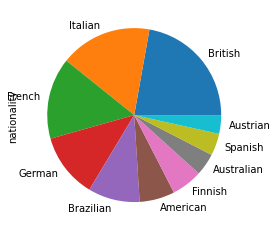

In [14]:
#Top 10 driver nationalities
df.nationality.value_counts()[:10].plot.pie()

<AxesSubplot:xlabel='ageAtRace', ylabel='Count'>

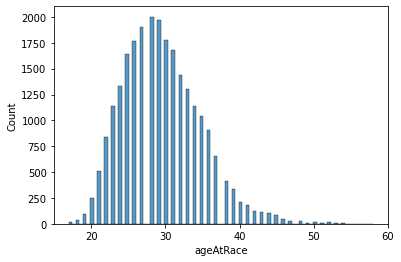

In [15]:
#Age distribution at time of race
sns.histplot(df.ageAtRace)

<AxesSubplot:ylabel='country'>

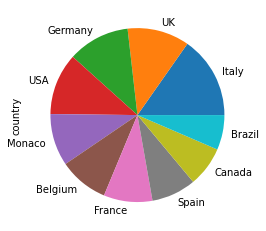

In [16]:
#Top 10 countries where GPs are located
df.country.value_counts()[:10].plot.pie()

<AxesSubplot:xlabel='q1', ylabel='Density'>

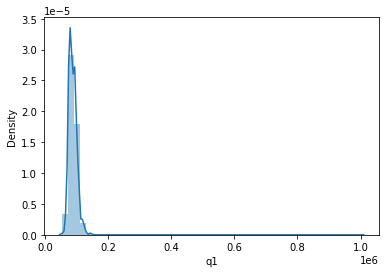

In [17]:
sns.distplot(qualifying["q1"])

<AxesSubplot:xlabel='laps', ylabel='Density'>

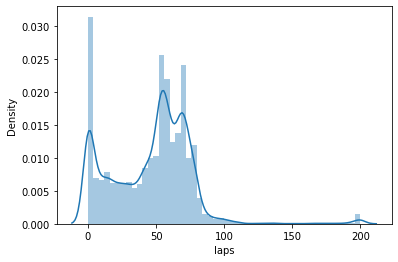

In [18]:
sns.distplot(results["laps"])

<AxesSubplot:xlabel='statusId', ylabel='Density'>

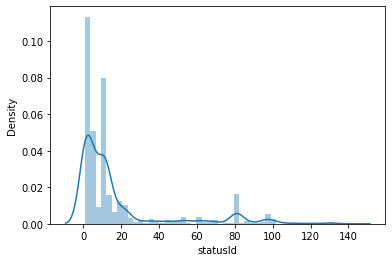

In [19]:
sns.distplot(results["statusId"])

## Complete Data - Multivariate Analysis

In [20]:
df = df.drop(["nationality", "country"], axis = 1)

[Text(0.5, 1.0, 'Complete Data Correlation Chart')]

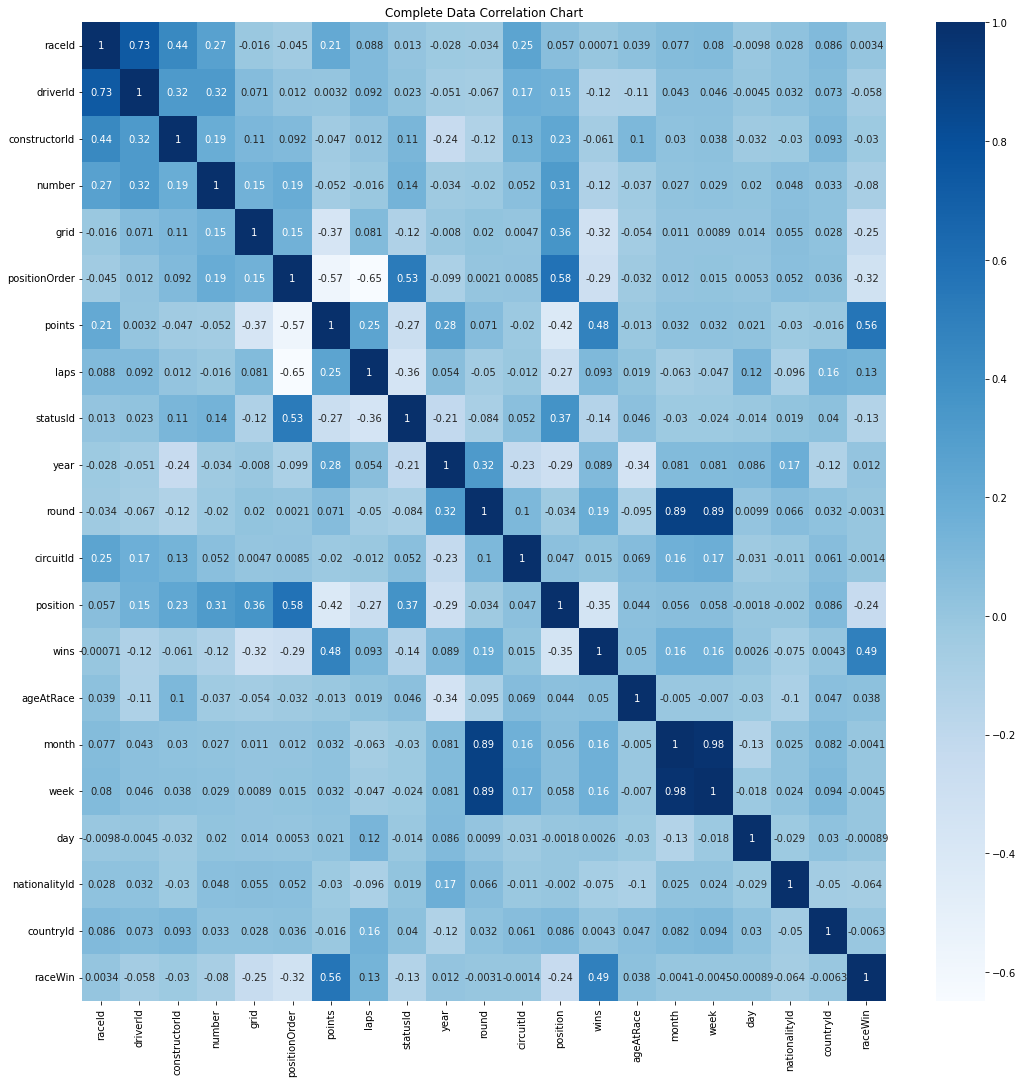

In [21]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), cbar = True, annot = True, cmap = 'Blues').set(title = "Complete Data Correlation Chart")

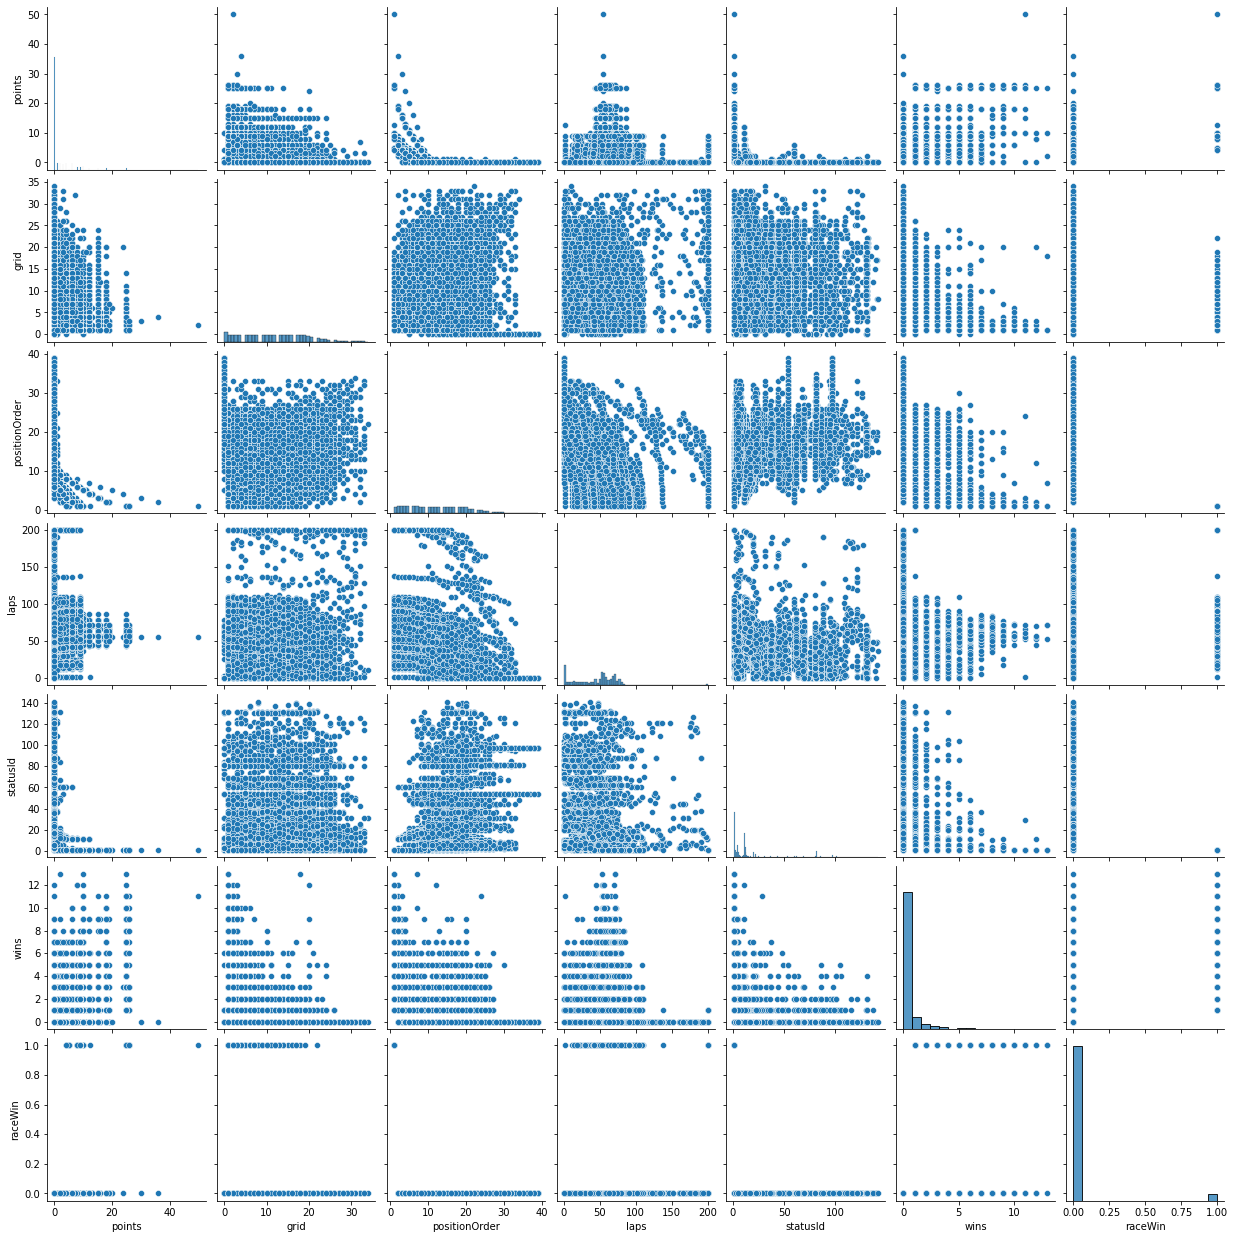

In [22]:
sns.pairplot(df, vars = ["points", "grid", "positionOrder", "laps", "statusId", "wins", "raceWin"])

## Grand Prix Specific Data - Multivariate Analysis

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25191 entries, 0 to 25190
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   raceId         25191 non-null  int64  
 1   driverId       25191 non-null  int64  
 2   constructorId  25191 non-null  int64  
 3   number         25185 non-null  float64
 4   grid           25191 non-null  int64  
 5   positionOrder  25191 non-null  int64  
 6   points         25191 non-null  float64
 7   laps           25191 non-null  int64  
 8   statusId       25191 non-null  int64  
 9   year           25191 non-null  int64  
 10  round          25191 non-null  int64  
 11  circuitId      25191 non-null  int64  
 12  position       25191 non-null  int64  
 13  wins           25191 non-null  int64  
 14  ageAtRace      25191 non-null  int64  
 15  month          25191 non-null  int64  
 16  week           25191 non-null  int64  
 17  day            25191 non-null  int64  
 18  nation

In [24]:
def circuit_corr_plot(circuitId, circuitName):
    circuit_df = df[df["circuitId"] == circuitId]
    plt.figure(figsize=(12,12))
    #sns.pairplot(circuit_df.drop(["circuitId", "month", "countryId"], axis = 1), vars = ["grid", "positionOrder", "points", "laps", "statusId", "position", "wins", "raceWin"])
    sns.heatmap(circuit_df.drop(["circuitId", "month", "countryId"], axis = 1).corr(), cbar = True, annot = True, cmap = 'Blues').set(title = circuitName)

In [25]:
#Circuits to analyze - Top 5 most raced circuits
target_circuits = df["circuitId"].value_counts()[:5]
circuits[circuits.circuitId.isin(target_circuits.index)]

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.7347,7.42056,7.0,http://en.wikipedia.org/wiki/Circuit_de_Monaco
6,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.5000,-73.52280,13.0,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...
8,9,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153.0,http://en.wikipedia.org/wiki/Silverstone_Circuit
12,13,spa,Circuit de Spa-Francorchamps,Spa,Belgium,50.4372,5.97139,401.0,http://en.wikipedia.org/wiki/Circuit_de_Spa-Fr...
13,14,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162.0,http://en.wikipedia.org/wiki/Autodromo_Naziona...


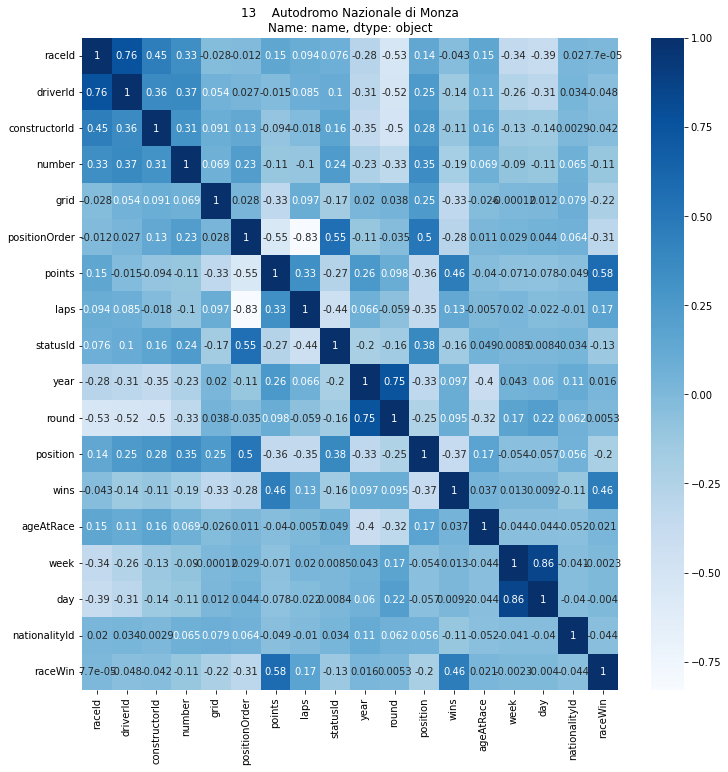

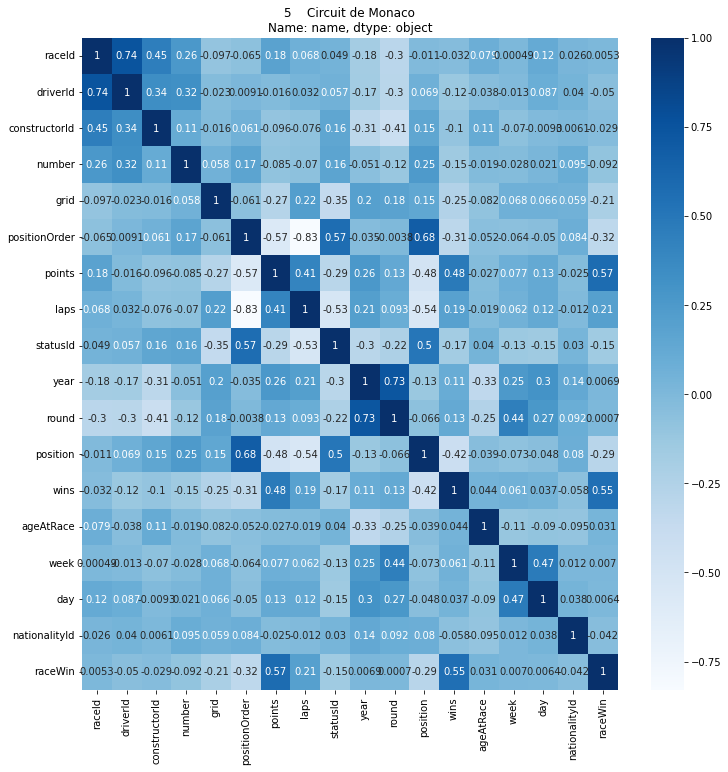

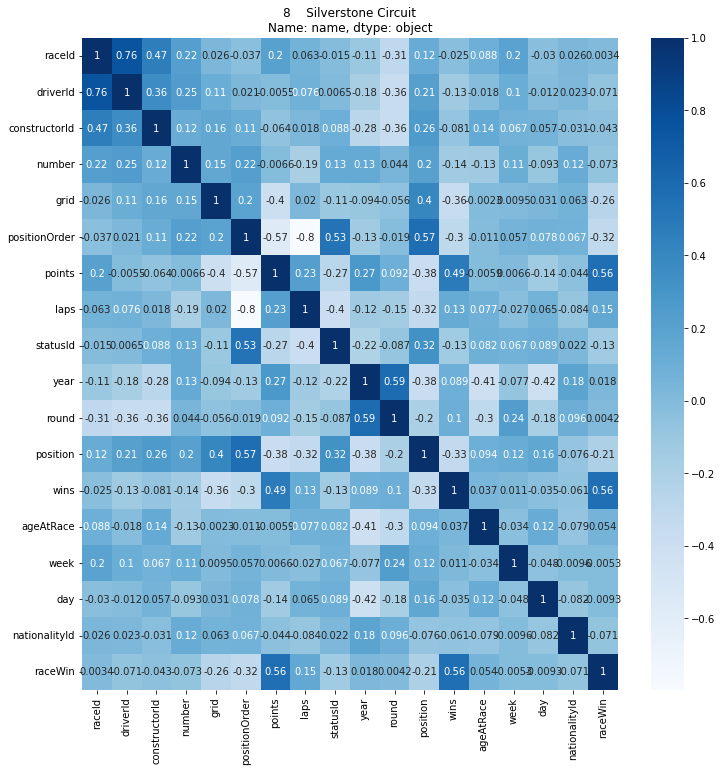

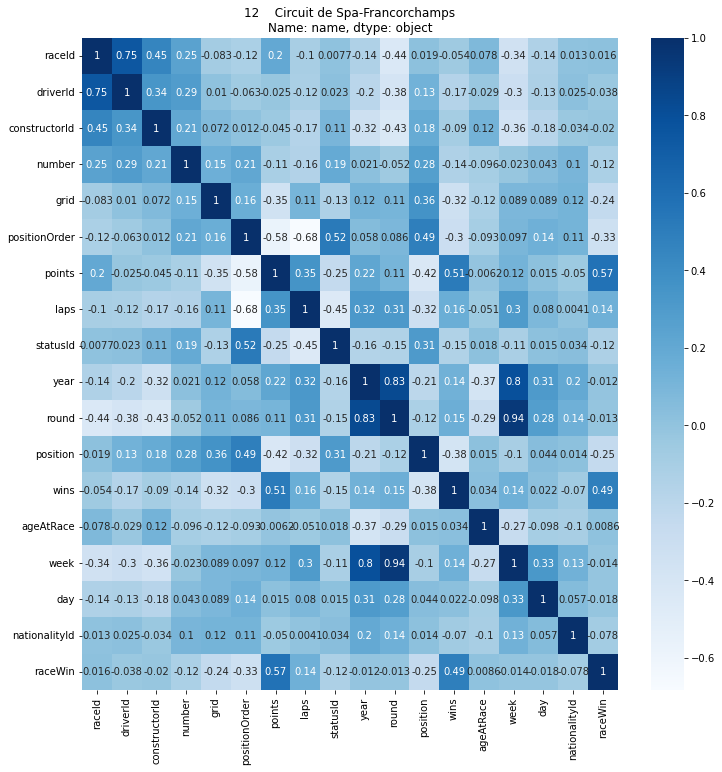

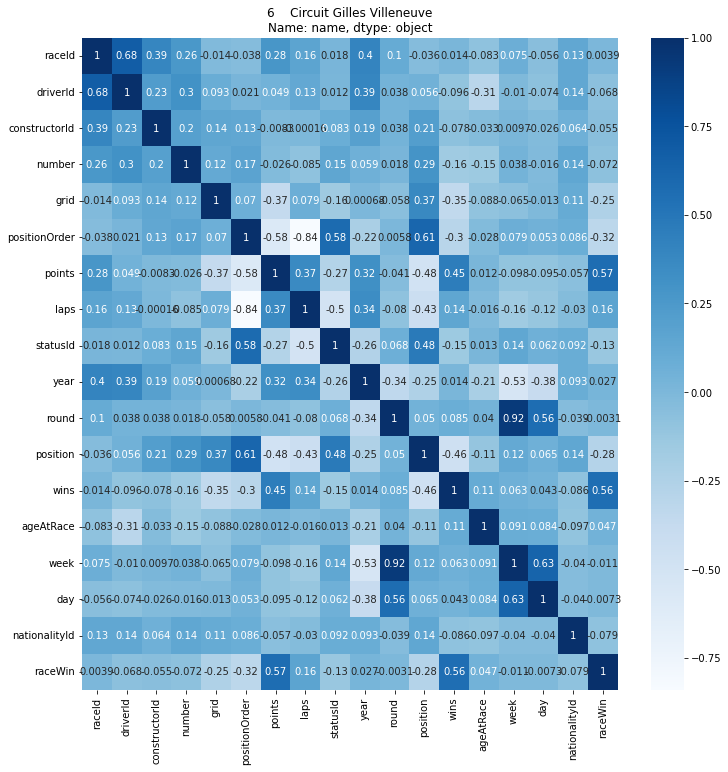

In [26]:
for circuitId in target_circuits.index:
    
    circuitName = str(circuits[circuits["circuitId"] == circuitId].name)
    #print(circuitName)
    circuit_corr_plot(circuitId, circuitName)

## Correlations

-ve correlation between race wins and starting grid position [-0.26, -0.21]

-ve correlation between race wins and finishing grid position [-0.33, -0.31]

+ve correlation between race wins and total points up until that moment in the season [0.56, 0.58]

+ve correlation between race wins and number of laps in the Grand Prix [0.14, 0.21]

+ve correlation between race wins and number of wins in the season [0.46, 0.56]

## Lap Time Variations

In [39]:
lap_races_merge = pd.merge(lap_times.copy().drop(["time"], axis = 1), races, on = "raceId")
lap_races_circuits_merge = pd.merge(lap_races_merge, circuits.copy().drop(["circuitRef", "location", "lat", "lng", "alt", "url"], axis = 1), on = "circuitId")
lap_races_circuits_merge.rename(columns = {"name_x": "grandPrixName", "name_y": "circuitName"}, inplace = True)
lap_races_circuits_merge

,raceId,driverId,lap,position,milliseconds,year,round,circuitId,grandPrixName,date,circuitName,country
0,841,20,1,1,98109,2011,1,1,Australian Grand Prix,2011-03-27,Albert Park Grand Prix Circuit,Australia
1,841,20,2,1,93006,2011,1,1,Australian Grand Prix,2011-03-27,Albert Park Grand Prix Circuit,Australia
2,841,20,3,1,92713,2011,1,1,Australian Grand Prix,2011-03-27,Albert Park Grand Prix Circuit,Australia
3,841,20,4,1,92803,2011,1,1,Australian Grand Prix,2011-03-27,Albert Park Grand Prix Circuit,Australia
4,841,20,5,1,92342,2011,1,1,Australian Grand Prix,2011-03-27,Albert Park Grand Prix Circuit,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...
528780,1078,20,50,11,93479,2022,5,79,Miami Grand Prix,2022-05-08,Miami International Autodrome,USA
528781,1078,20,51,11,94298,2022,5,79,Miami Grand Prix,2022-05-08,Miami International Autodrome,USA
528782,1078,20,52,11,94217,2022,5,79,Miami Grand Prix,2022-05-08,Miami International Autodrome,USA
528783,1078,20,53,9,93631,2022,5,79,Miami Grand Prix,2022-05-08,Miami International Autodrome,USA


In [31]:
for circuitId in target_circuits.index:
    print(circuitId)

14
6
9
13
7


In [51]:
current_circuit = lap_races_circuits_merge[lap_races_circuits_merge["circuitId"] == 6]
current_circuit = current_circuit.sort_values(by = ["year"])
current_circuit

,raceId,driverId,lap,position,milliseconds,year,round,circuitId,grandPrixName,date,circuitName,country
107062,229,57,8,10,112469,1996,6,6,Monaco Grand Prix,1996-05-19,Circuit de Monaco,Monaco
106865,229,56,54,9,87424,1996,6,6,Monaco Grand Prix,1996-05-19,Circuit de Monaco,Monaco
106866,229,56,55,9,87798,1996,6,6,Monaco Grand Prix,1996-05-19,Circuit de Monaco,Monaco
106867,229,56,56,9,86443,1996,6,6,Monaco Grand Prix,1996-05-19,Circuit de Monaco,Monaco
106868,229,56,57,9,86673,1996,6,6,Monaco Grand Prix,1996-05-19,Circuit de Monaco,Monaco
...,...,...,...,...,...,...,...,...,...,...,...,...
132148,1080,4,5,7,101549,2022,7,6,Monaco Grand Prix,2022-05-29,Circuit de Monaco,Monaco
132147,1080,4,4,7,102916,2022,7,6,Monaco Grand Prix,2022-05-29,Circuit de Monaco,Monaco
132146,1080,4,3,7,106608,2022,7,6,Monaco Grand Prix,2022-05-29,Circuit de Monaco,Monaco
132162,1080,4,19,6,92069,2022,7,6,Monaco Grand Prix,2022-05-29,Circuit de Monaco,Monaco


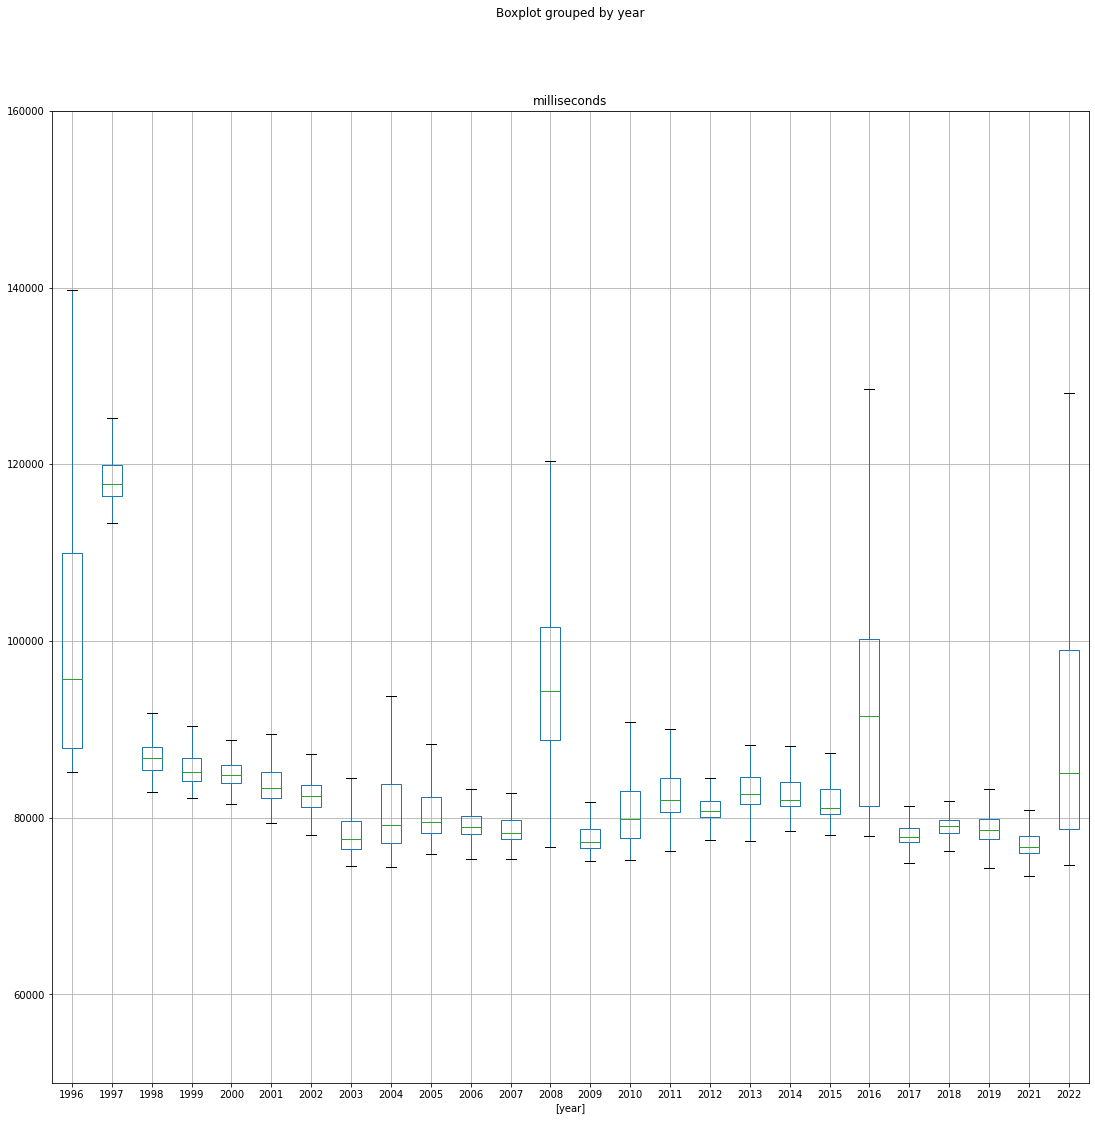

In [72]:

current_circuit[["milliseconds", "year"]].boxplot(by = "year", figsize = (18,18), showfliers = False)

plt.ylim(50000, 160000)

plt.show()

In [55]:
current_circuit.year.unique()

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2021, 2022])

In [93]:
lap_races_merge

,raceId,driverId,lap,position,milliseconds,year,round,circuitId,name,date
0,841,20,1,1,98109,2011,1,1,Australian Grand Prix,2011-03-27
1,841,20,2,1,93006,2011,1,1,Australian Grand Prix,2011-03-27
2,841,20,3,1,92713,2011,1,1,Australian Grand Prix,2011-03-27
3,841,20,4,1,92803,2011,1,1,Australian Grand Prix,2011-03-27
4,841,20,5,1,92342,2011,1,1,Australian Grand Prix,2011-03-27
...,...,...,...,...,...,...,...,...,...,...
528780,1086,842,65,13,85989,2022,13,11,Hungarian Grand Prix,2022-07-31
528781,1086,842,66,12,85187,2022,13,11,Hungarian Grand Prix,2022-07-31
528782,1086,842,67,12,107355,2022,13,11,Hungarian Grand Prix,2022-07-31
528783,1086,842,68,12,97587,2022,13,11,Hungarian Grand Prix,2022-07-31


In [87]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   raceId     1079 non-null   int64         
 1   year       1079 non-null   int64         
 2   round      1079 non-null   int64         
 3   circuitId  1079 non-null   int64         
 4   name       1079 non-null   object        
 5   date       1079 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 50.7+ KB


In [86]:
df.head()

,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,year,round,circuitId,position,wins,ageAtRace,month,week,day,nationalityId,countryId,raceWin
0,18,1,1,22.0,1,1,10.0,58,1,2008,1,1,1,1,23,3,11,16,8,1,1
1,36,1,1,2.0,4,3,6.0,58,1,2007,1,1,3,0,22,3,11,18,8,1,0
2,338,1,1,2.0,11,6,8.0,58,1,2010,2,1,4,0,25,3,12,28,8,1,0
3,841,1,1,3.0,2,2,18.0,58,1,2011,1,1,2,0,26,3,12,27,8,1,0
4,860,1,1,4.0,1,3,15.0,58,1,2012,1,1,3,0,27,3,11,18,8,1,0


In [ ]:
#OLD 2

In [ ]:
#MERGE DATA FOR 1 TRACK

merge1 = pd.merge(results, races, on = "raceId")
merge2 = pd.merge(merge1, drivers, on = "driverId")
merge3 = pd.merge(merge2, driver_standings, on = "driverId")
merge4 = pd.merge(merge3, constructors, on = "constructorId")
df = pd.merge(merge4, status, on = "statusId")

In [ ]:
#OLD

In [ ]:
lap_times_races_merge = pd.merge(lap_times, races, on = "raceId", how = "outer")
lap_times_drivers_merge = pd.merge(lap_times_races_merge, new_drivers, on = "driverId")
lap_times_drivers_merge

In [ ]:
years = np.sort(lap_times_drivers_merge["year"].unique())[::-1]

In [ ]:
lap_times_drivers_merge.dtypes

In [ ]:
lap_times_drivers_merge[lap_times_drivers_merge["year"] == 2021]

In [ ]:
lap_times_drivers_merge[lap_times_drivers_merge["year"] == 2022]

In [ ]:
year_2021 = lap_times_drivers_merge[lap_times_drivers_merge["year"] == 2021]
year_2021 = year_2021.sort_values(by=["round", "driverId"])
total_rounds_2021 = year_2021["round"].unique()

for current_round in total_rounds_2021:
    print("CURRENT ROUND IS: " + str(current_round))
    race_df = year_2021[year_2021["round"] == current_round]
    race_name = str(race_df["name"].unique()[0])
    print("CURRENT GP IS: " + race_name)
    plot_race(race_df, race_name)
    #print(year_2021[year_2021["round"] == current_round])

In [ ]:
bahrain_2021 = lap_times_drivers_merge[lap_times_drivers_merge["raceId"] == 1052]
bahrain_2021

In [ ]:
def plot_race (df, race):
    
    scatter_drivers = px.scatter(
    data_frame = df, 
    x = "lap", 
    y = "milliseconds", 
    color = "code",
    title = race,
    trendline = "rolling",
    trendline_options = dict(window = 1))
    
    pio.show(scatter_drivers)

In [ ]:
pit_stops.head()

In [ ]:
pit_stops.head()

In [ ]:
qualifying.head()

In [ ]:
races.head()

In [ ]:
constructor_races_merge = pd.merge(constructor_results, new_races, on="raceId")
constructor_races_merge = pd.merge(constructor_races_merge, new_constructors, on="constructorId")
constructor_races_merge

In [ ]:
year_2020_races = constructor_races_merge[constructor_races_merge["year"] == 2021]
year_2020_races

In [ ]:
scatter = px.scatter(
    data_frame = year_2020_races, 
    x = "date", 
    y = "points", 
    color = "name_y", 
    color_discrete_map = {"McLaren": "orange", 
                          "Williams": "cyan", 
                          "Renault": "yellow", 
                          "Ferrari": "red", 
                          "Red Bull": "darkblue",
                          "Alfa Romeo": "lightgreen",
                          "Mercedes": "darkgrey",
                          "Haas F1 Team": "lightgrey",
                          "Racing Point": "pink",
                          "AlphaTauri": "blue",
                          "Alpine F1 Team": "pink",
                          "Aston Martin": "darkgreen"},
    trendline = "rolling",
    trendline_options=dict(window=3))
pio.show(scatter)

In [ ]:
results.head()

In [ ]:
sprint_results.head()

In [ ]:
year_2020 = races[races['year'] == 2020]
year_2020_index = year_2020.index
year_2020_dates = year_2020['date']

year_2020_constructors = pd.DataFrame()

year_2020_constructors = constructor_standings[constructor_standings['raceId'].isin(year_2020_index)]

#for race_index in year_2020_index:
#    current_race = constructor_standings[constructor_standings['raceId'] == race_index]
#    year_2020_constructors = year_2020_constructors.append(current_race)

print(year_2020_constructors)